In [8]:
import numpy as np
import pandas as pd
import polars as pol # i use polars for data loading cleaning 
import os
import matplotlib.pyplot as plt

In [9]:
batch = os.getcwd()

path = os.path.join(batch, '..', 'data','processed.cleveland.data')

path

'c:\\Users\\sumit\\OneDrive\\Desktop\\practice\\ml-heart-diagnosis-system\\notebooks\\..\\data\\processed.cleveland.data'

In [10]:
import polars as pl

df = pl.read_csv(
    path,
    has_header=False,
    null_values="?"
)

df.columns = ['age','sex','cp','trestbps','chol','fbs',
              'restecg','thalach','exang','oldpeak',
              'slope','ca','thal','target']

df.rows

<bound method DataFrame.rows of shape: (303, 14)
┌──────┬─────┬─────┬──────────┬───┬───────┬──────┬──────┬────────┐
│ age  ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca   ┆ thal ┆ target │
│ ---  ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ ---  ┆ ---  ┆ ---    │
│ f64  ┆ f64 ┆ f64 ┆ f64      ┆   ┆ f64   ┆ f64  ┆ f64  ┆ i64    │
╞══════╪═════╪═════╪══════════╪═══╪═══════╪══════╪══════╪════════╡
│ 63.0 ┆ 1.0 ┆ 1.0 ┆ 145.0    ┆ … ┆ 3.0   ┆ 0.0  ┆ 6.0  ┆ 0      │
│ 67.0 ┆ 1.0 ┆ 4.0 ┆ 160.0    ┆ … ┆ 2.0   ┆ 3.0  ┆ 3.0  ┆ 2      │
│ 67.0 ┆ 1.0 ┆ 4.0 ┆ 120.0    ┆ … ┆ 2.0   ┆ 2.0  ┆ 7.0  ┆ 1      │
│ 37.0 ┆ 1.0 ┆ 3.0 ┆ 130.0    ┆ … ┆ 3.0   ┆ 0.0  ┆ 3.0  ┆ 0      │
│ 41.0 ┆ 0.0 ┆ 2.0 ┆ 130.0    ┆ … ┆ 1.0   ┆ 0.0  ┆ 3.0  ┆ 0      │
│ …    ┆ …   ┆ …   ┆ …        ┆ … ┆ …     ┆ …    ┆ …    ┆ …      │
│ 45.0 ┆ 1.0 ┆ 1.0 ┆ 110.0    ┆ … ┆ 2.0   ┆ 0.0  ┆ 7.0  ┆ 1      │
│ 68.0 ┆ 1.0 ┆ 4.0 ┆ 144.0    ┆ … ┆ 2.0   ┆ 2.0  ┆ 7.0  ┆ 2      │
│ 57.0 ┆ 1.0 ┆ 4.0 ┆ 130.0    ┆ … ┆ 2.0   ┆ 1.0  ┆ 7.0  ┆ 3      │
│ 57.0 ┆ 0.0 

In [11]:
df = df.with_columns(
    pl.col("age").cast(pl.Int64)
)
df = df.with_columns(
    pl.col("sex").cast(pl.Int64)
)

In [12]:
df.rows

<bound method DataFrame.rows of shape: (303, 14)
┌─────┬─────┬─────┬──────────┬───┬───────┬──────┬──────┬────────┐
│ age ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ slope ┆ ca   ┆ thal ┆ target │
│ --- ┆ --- ┆ --- ┆ ---      ┆   ┆ ---   ┆ ---  ┆ ---  ┆ ---    │
│ i64 ┆ i64 ┆ f64 ┆ f64      ┆   ┆ f64   ┆ f64  ┆ f64  ┆ i64    │
╞═════╪═════╪═════╪══════════╪═══╪═══════╪══════╪══════╪════════╡
│ 63  ┆ 1   ┆ 1.0 ┆ 145.0    ┆ … ┆ 3.0   ┆ 0.0  ┆ 6.0  ┆ 0      │
│ 67  ┆ 1   ┆ 4.0 ┆ 160.0    ┆ … ┆ 2.0   ┆ 3.0  ┆ 3.0  ┆ 2      │
│ 67  ┆ 1   ┆ 4.0 ┆ 120.0    ┆ … ┆ 2.0   ┆ 2.0  ┆ 7.0  ┆ 1      │
│ 37  ┆ 1   ┆ 3.0 ┆ 130.0    ┆ … ┆ 3.0   ┆ 0.0  ┆ 3.0  ┆ 0      │
│ 41  ┆ 0   ┆ 2.0 ┆ 130.0    ┆ … ┆ 1.0   ┆ 0.0  ┆ 3.0  ┆ 0      │
│ …   ┆ …   ┆ …   ┆ …        ┆ … ┆ …     ┆ …    ┆ …    ┆ …      │
│ 45  ┆ 1   ┆ 1.0 ┆ 110.0    ┆ … ┆ 2.0   ┆ 0.0  ┆ 7.0  ┆ 1      │
│ 68  ┆ 1   ┆ 4.0 ┆ 144.0    ┆ … ┆ 2.0   ┆ 2.0  ┆ 7.0  ┆ 2      │
│ 57  ┆ 1   ┆ 4.0 ┆ 130.0    ┆ … ┆ 2.0   ┆ 1.0  ┆ 7.0  ┆ 3      │
│ 57  ┆ 0   ┆ 2.0 ┆ 130.0  

In [13]:
df.null_count().sum()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,4,2,0


In [14]:
X, y = df.drop('target'), df['target']

In [15]:
X.columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [16]:
f_col = df.select(pol.col(pol.Float64))
i_col = df.select(pol.col(pol.Int64))

In [17]:
X = X.with_columns(
    pl.col(pl.Float64).fill_null(
        pl.col(pl.Float64).mean()
    )
)

X = X.with_columns(
    pl.col(pl.Int64).fill_null(
        pl.col(pl.Int64).mean()
    )
)

In [18]:
X.null_count(), y.null_count()

(shape: (1, 13)
 ┌─────┬─────┬─────┬──────────┬───┬─────────┬───────┬─────┬──────┐
 │ age ┆ sex ┆ cp  ┆ trestbps ┆ … ┆ oldpeak ┆ slope ┆ ca  ┆ thal │
 │ --- ┆ --- ┆ --- ┆ ---      ┆   ┆ ---     ┆ ---   ┆ --- ┆ ---  │
 │ u32 ┆ u32 ┆ u32 ┆ u32      ┆   ┆ u32     ┆ u32   ┆ u32 ┆ u32  │
 ╞═════╪═════╪═════╪══════════╪═══╪═════════╪═══════╪═════╪══════╡
 │ 0   ┆ 0   ┆ 0   ┆ 0        ┆ … ┆ 0       ┆ 0     ┆ 0   ┆ 0    │
 └─────┴─────┴─────┴──────────┴───┴─────────┴───────┴─────┴──────┘,
 0)

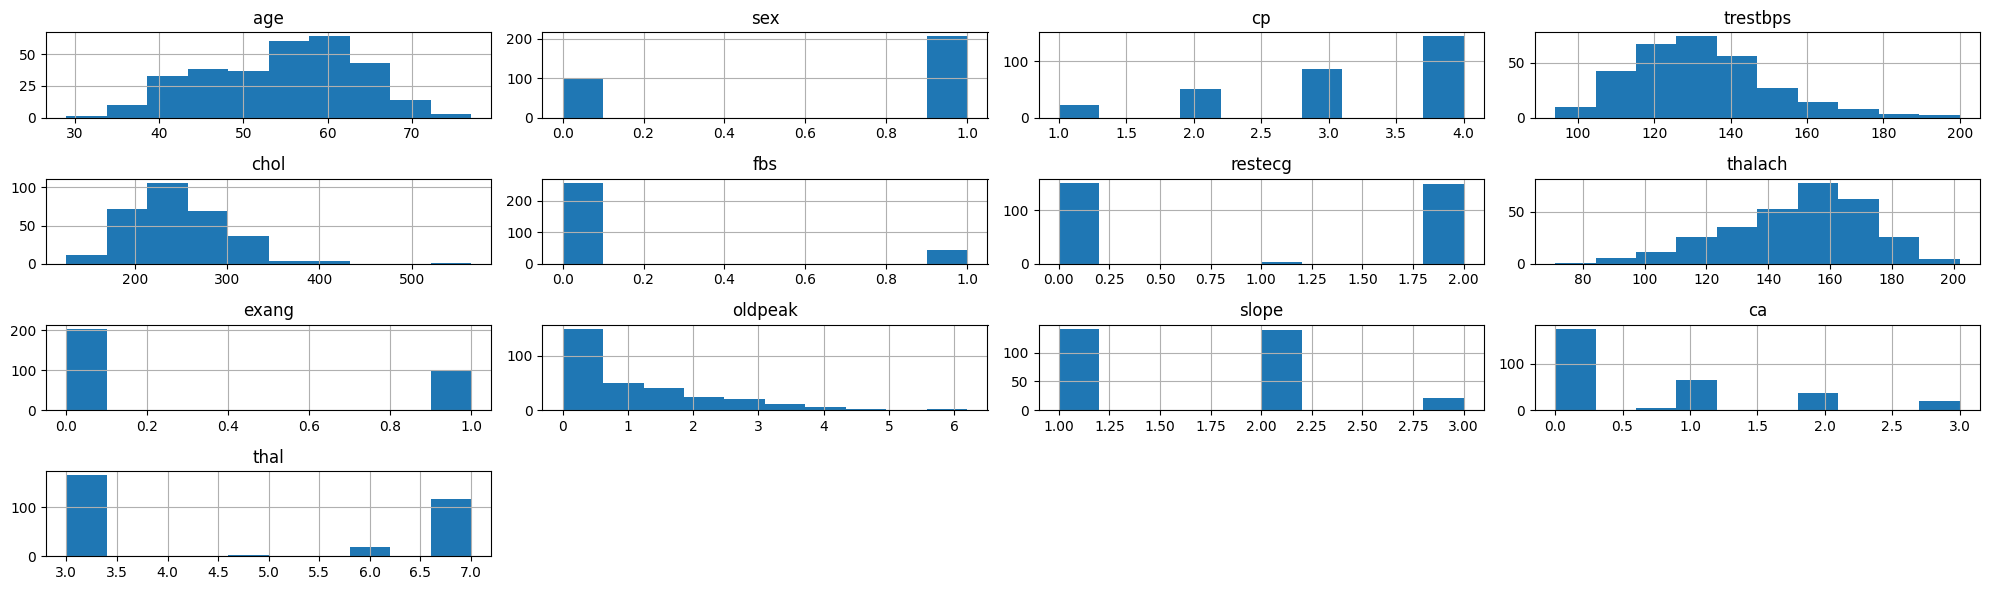

In [19]:


X_pd = X.to_pandas()

X_pd.hist(figsize=(20, 6))
plt.tight_layout()
plt.show()

<Axes: >

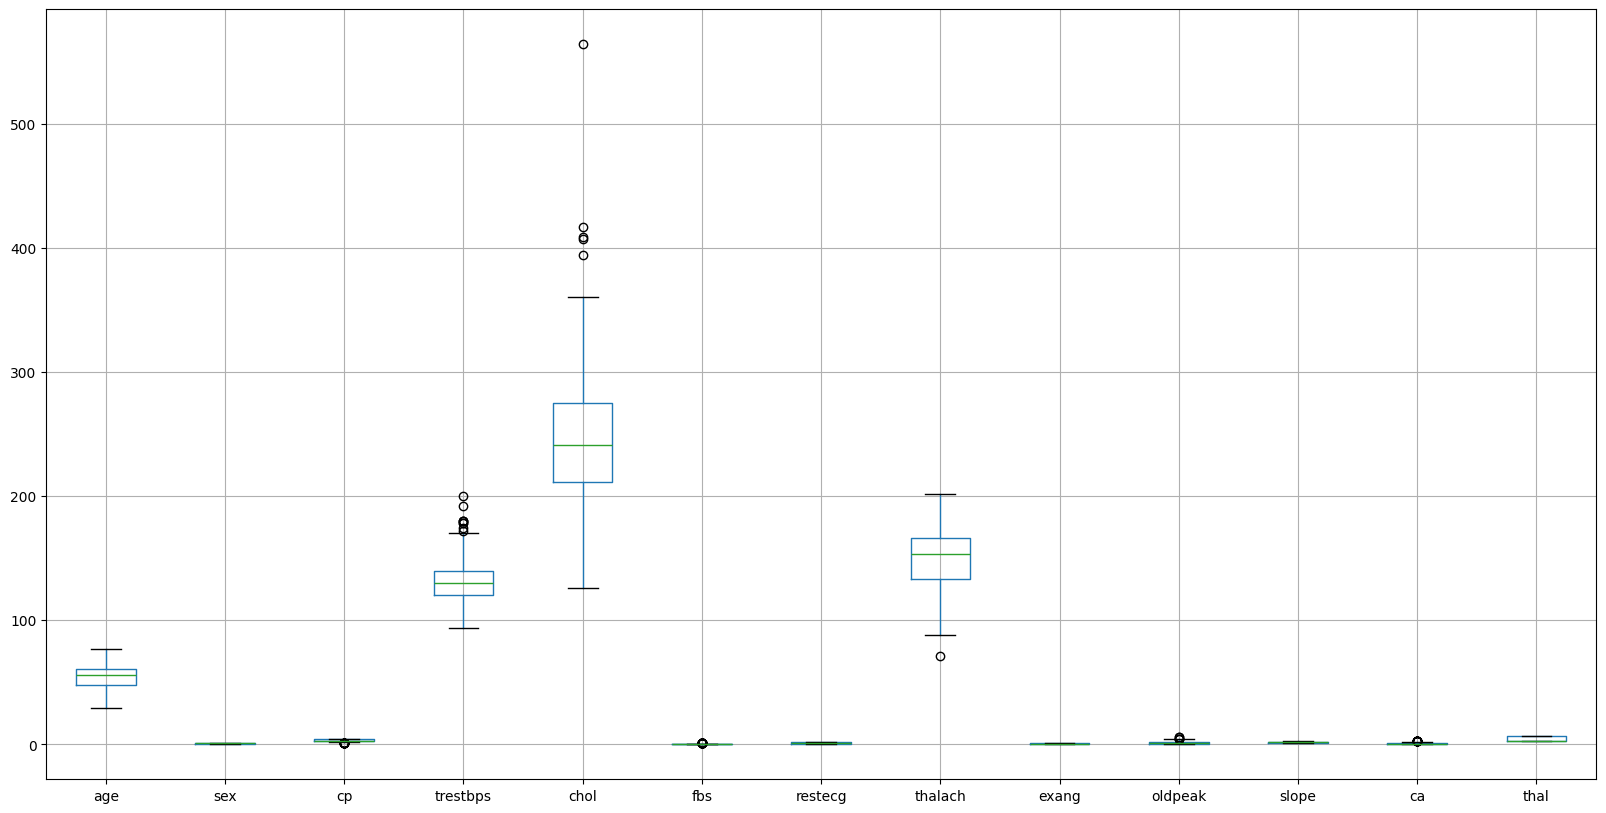

In [20]:
X_pd.boxplot(figsize=(20, 10))

## Apply outlier detection 

In [21]:
outlier_column = ['trestbps', 'chol', 'thalach']

for colm in outlier_column:
    Q1 = X.select(pl.col(colm).quantile(0.25)).item()
    Q3 = X.select(pl.col(colm).quantile(0.75)).item()

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    X_clean = X.filter(
        (pl.col(colm) >= lower) & 
        (pl.col(colm) <= upper)
    )



<Axes: >

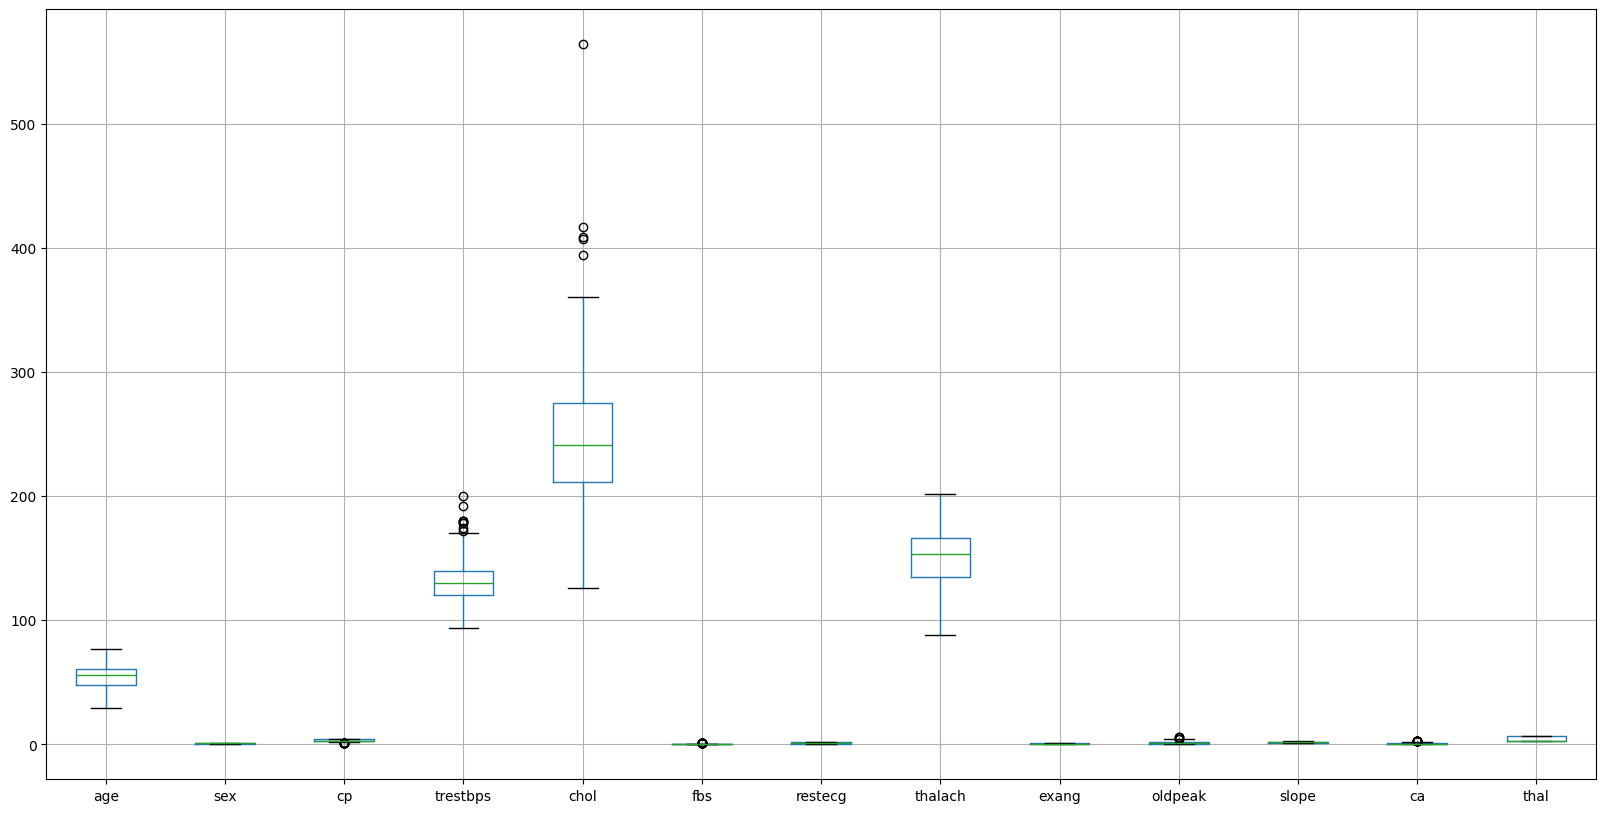

In [22]:
X_pd = X_clean.to_pandas()
X_pd.boxplot(figsize=(20, 10))


In [23]:
import polars as pl


for col in outlier_column:
    Q1 = X.select(pl.col(col).quantile(0.25)).item()
    Q3 = X.select(pl.col(col).quantile(0.75)).item()
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    X = X.with_columns(
        pl.when(pl.col(col) < lower)
        .then(lower)
        .when(pl.col(col) > upper)
        .then(upper)
        .otherwise(pl.col(col))
        .alias(col)
    )

<Axes: >

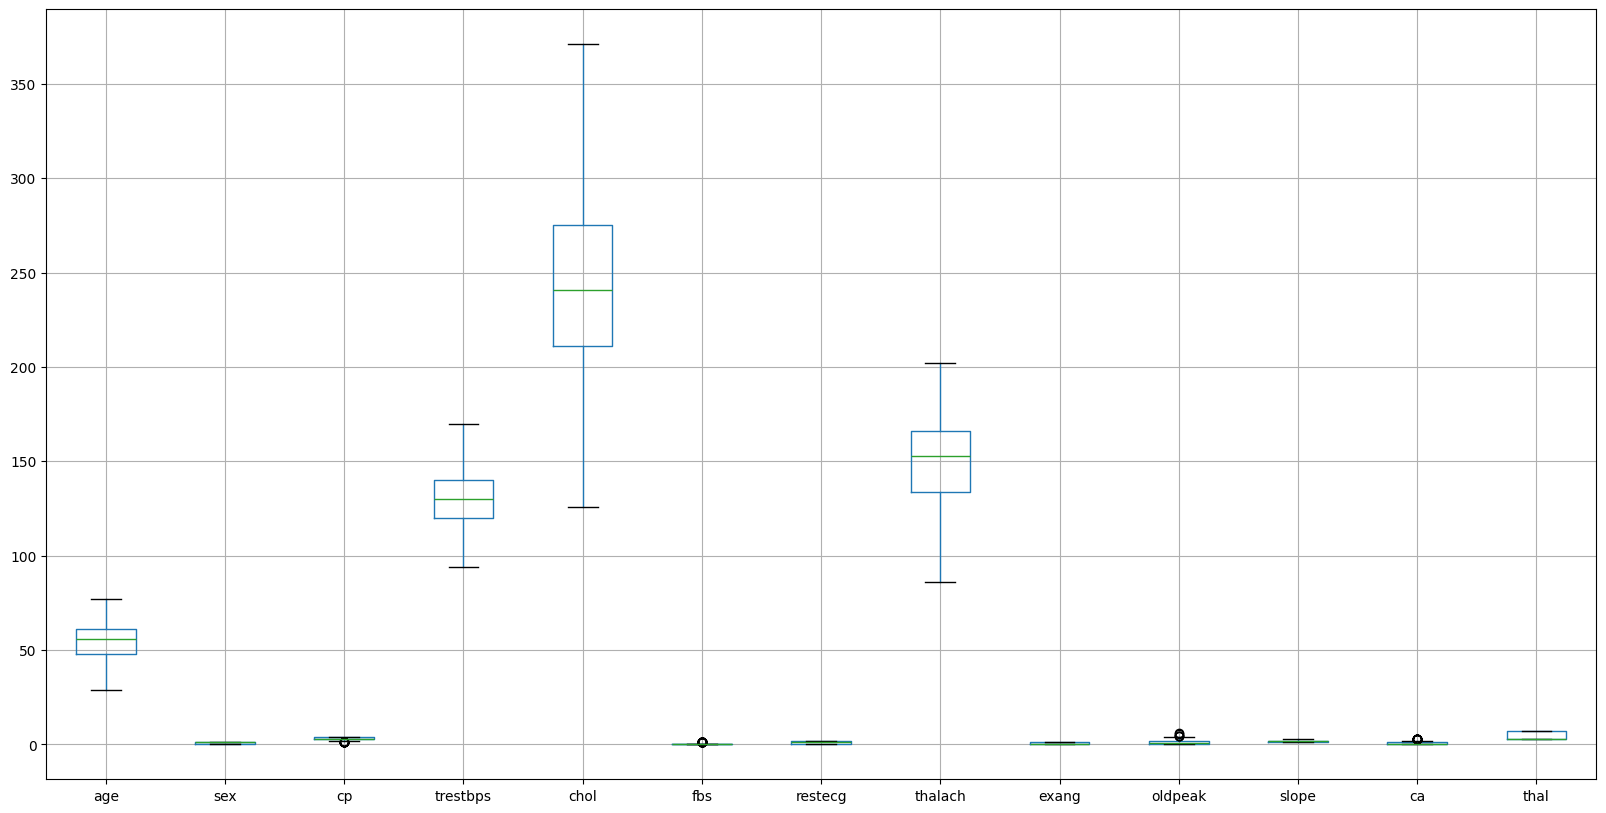

In [24]:
X_pd = X.to_pandas()
X_pd.boxplot(figsize=(20, 10))


In [25]:
X.null_count()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
y.value_counts()

target,count
i64,u32
4,13
1,55
2,36
0,164
3,35


In [27]:
y = y.replace([2,  3, 4], 1)

In [28]:
y.value_counts()

target,count
i64,u32
0,164
1,139


In [29]:
X.head()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


## Scikit working starting

In [30]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [31]:
scale = StandardScaler()

pipe = Pipeline(
    steps=[
        ('scaled', scale),
        # ('model', DecisionTreeClassifier()) # 75%
        # ('model', LogisticRegression())  # 88%
        ('model', RandomForestClassifier())  # 88%

    ]
)




In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaled', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2


In [34]:
pipe.score(X_test, y_test)

0.8852459016393442

In [35]:
from scipy.stats import randint, uniform

# param_dist = {
#     "model__criterion": ["gini", "entropy", "log_loss"],
#     "model__max_depth": randint(3, 20),
#     "model__min_samples_split": randint(2, 20),
#     "model__min_samples_leaf": randint(1, 20),
#     "model__max_features": [None, "sqrt", "log2"]
# }

# param_dist = {
#     "model__C": uniform(0.01, 10),                 # 0.01 to 10 range
#     "model__penalty": ["l1", "l2", "elasticnet"],
#     "model__solver": ["liblinear", "saga"],        # compatible with l1 & elasticnet
#     "model__class_weight": [None, "balanced"],
#     "model__l1_ratio": uniform(0, 1)               # only used for elasticnet
# }

param_dist = {
    "model__n_estimators": randint(100, 500),
    "model__max_depth": randint(3, 30),
    "model__min_samples_split": randint(2, 20),
    "model__min_samples_leaf": randint(1, 20),
    "model__max_features": ["sqrt", "log2", None],
    "model__bootstrap": [True, False],
    "model__class_weight": [None, "balanced"]
}

In [36]:
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=50,              # number of random combinations
    cv=5,                   # 5-fold cross validation
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

In [37]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...lassifier())])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'model__bootstrap': [True, False], 'model__class_weight': [None, 'balanced'], 'model__max_depth': <scipy.stats....001BD6D448EF0>, 'model__max_features': ['sqrt', 'log2', ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",50
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variou

In [38]:
random_search.score(X_test, y_test)

0.9016393442622951

In [39]:
best_model = random_search.best_estimator_
print(best_model, random_search.best_params_)

Pipeline(steps=[('scaled', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=14,
                                        min_samples_split=19,
                                        n_estimators=364))]) {'model__bootstrap': True, 'model__class_weight': None, 'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 14, 'model__min_samples_split': 19, 'model__n_estimators': 364}


In [40]:
y_pred = best_model.predict(X_test)

data = pl.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

data.head(10)

Actual,Predicted
i64,i64
0,0
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,0


In [41]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, recall_score, f1_score


In [42]:
confu = confusion_matrix(y_test, y_pred)
accuracy_score = accuracy_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [43]:
print(confu)
print(accuracy_score)
print(recall_score)
print(f1_score)

[[27  2]
 [ 4 28]]
0.9016393442622951
0.875
0.9032258064516129


## evaluation model save for roc_curve

In [50]:
y_probo = best_model.predict_proba(X_test)[:, 1]

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_probo)
roc_auc = auc(fpr, tpr)

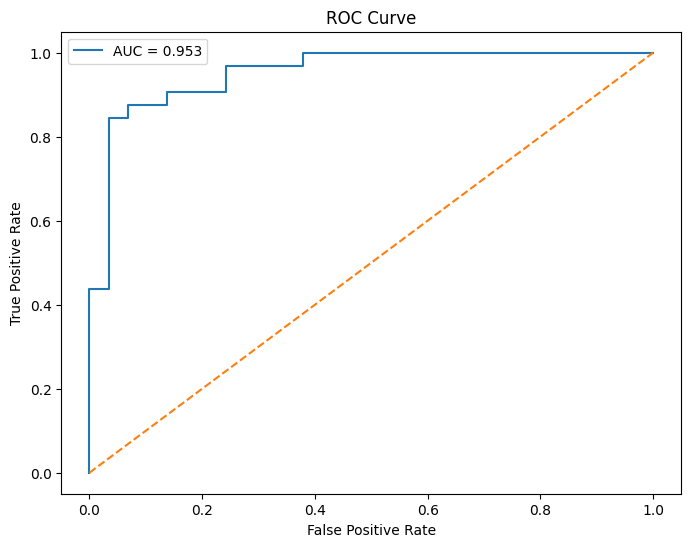

In [65]:
plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")   # diagonal line

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()


base_path = os.getcwd()
image_folder = os.path.join(base_path, '..', 'image')
# Create folder if not exists
os.makedirs(image_folder, exist_ok=True)

path_photo = os.path.join(image_folder, 'roc_curve.png')
plt.savefig(path_photo)
plt.show()

## model save 


In [67]:
import skops.io as sko

In [71]:
model_path = os.getcwd()
folder_path = os.path.join(model_path, '..', 'models')
os.makedirs(folder_path, exist_ok=True)
folder_name = os.path.join(folder_path, 'heart_model.skops')
sko.dump(best_model, folder_name)

In [72]:
X.head()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [75]:
X['cp'].value_counts()

cp,count
f64,u32
3.0,86
1.0,23
4.0,144
2.0,50
